<a href="https://colab.research.google.com/github/murtazav/Model_predictive_control/blob/master/visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# best controller parameterfinder using genetic algorithm
import numpy as np
import random
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
population = 20
kp_arr = np.zeros(population)
ki_arr = np.zeros(population)
fit_arr = np.zeros(population)

kp_max = 100.0
kp_min = 0.0
ki_max = 100.0
ki_min = 0.0
itr = 200



In [0]:
#2012 non linear model
#environment with bicycle model which returns fitness of a controller
def envm(kp, ki):
  mfl=158  # mass at front left wheel
  mfr=137  # mass at front right wheel
  mrl=360  # mass at rear left wheel
  mrr=269  # mass at front right wh

  m = 924  #mass of the vehicle

  lf= 1.31  # location of centre of gravity from the front axle
  lr=0.62   # location of centre of gravity from the rear axle
  Iz=748    # moment of inertia
  l=lf+lr

  V=1
  #cornering stiffness of tyre
  Cf=27359
  Cr=58535
  dt=0.01
  tf=10
  vy = np.zeros(1500)
  vy_dot = np.zeros(1500)
  delt_4 = np.zeros(1500) 
  theta_dot = np.zeros(1500)
  theta_4 = np.zeros(1500)
  theta_des = np.zeros(1500)
  theta_ddot = np.zeros(1500)
  e = np.zeros(1500)
  e_int = np.zeros(1500)
  fitness =0
  time = np.zeros(15000)
  for i in range(1,len(time)):
    time[i] = time[i-1]+dt
  i=1
  for t in time[0:1000]:
    if i>=100:
      theta_des[i]=0.349

    e[i] = (theta_des[i]-theta_4[i-1])
    fitness = fitness - np.power(t,2)*np.absolute(e[i])*dt
    e_int[i] = e_int[i-1]+e[i]*0.001
    delt_4[i]=kp*e[i]+ki*e_int[i]

    vy_dot[i]=-V*theta_dot[i-1]+1/m*(Cr*(-np.arctan((vy[i-1]-lr*theta_dot[i-1])/V))+Cf*(delt_4[i]-np.arctan((vy[i-1]+lf*theta_dot[i-1])/V))*np.cos(delt_4[i]))
    theta_ddot[i]=1/Iz*(Cr*lr*(-np.arctan((vy[i-1]-lr*theta_dot[i-1])/V))+Cf*(delt_4[i]-np.arctan((vy[i-1]+lf*theta_dot[i-1])/V))*np.cos(delt_4[i])*lf)

    theta_dot[i] = theta_ddot[i]*dt +theta_dot[i-1]
    theta_4[i] = theta_dot[i]*dt+theta_4[i-1]
    vy[i] = vy_dot[i]*dt+vy[i-1]
    i = i+1 
    #print(fitness)
  #plt.plot(time[0:10000],theta_4[0:10000]*180/np.pi)
  #plt.plot(time[0:10000],theta_des[0:10000]*180/np.pi)
  
  #plt.plot(time[0:10000],delt_4[0:10000]*180/np.pi)
  #plt.legend(['heading_angle','desired heading','steering angle'])
  #plt.xlabel('time in s')
  #plt.ylabel('Angle in degrees')
  # linearly penalizing max steering angle, max overshoot, randomly improving fitness with mean 5 and std 5 to introduce luck in evolution process
  fitness = 10*fitness - 40*np.amax(delt_4[0:1000]) -100*(np.amax(theta_4[0:1000])-np.amax(theta_des[0:1000])) + (np.random.randn()*5+5)
  return fitness



In [0]:
#2012 linear model
#environment with bicycle model which returns fitness of a controller
def envm(kp, ki):
  mfl=158  # mass at front left wheel
  mfr=137  # mass at front right wheel
  mrl=360  # mass at rear left wheel
  mrr=269  # mass at front right wh

  m = 924  #mass of the vehicle

  lf= 1.31  # location of centre of gravity from the front axle
  lr=0.62   # location of centre of gravity from the rear axle
  Iz=748    # moment of inertia
  l=lf+lr

  V=2.4
  #cornering stiffness of tyre
  Cf=27359
  Cr=58535
  dt=0.01
  tf=10
  delt_max=30*np.pi/180
  vy = np.zeros(1500)
  vy_dot = np.zeros(1500)
  delt_4 = np.zeros(1500) 
  theta_dot = np.zeros(1500)
  theta_4 = np.zeros(1500)
  theta_des = np.zeros(1500)
  theta_ddot = np.zeros(1500)
  e = np.zeros(1500)
  e_int = np.zeros(1500)
  fitness =0
  time = np.zeros(1500)
  for i in range(1,len(time)):
    time[i] = time[i-1]+dt
  i=1
  for t in time[0:1000]:
    if i>=100:
      theta_des[i]=0.349
    
    e[i] = (theta_des[i]-theta_4[i-1])
    fitness = fitness - np.power(t,2)*np.absolute(e[i])*dt
    e_int[i] = e_int[i-1]+e[i]*0.001
    delt_4[i]=kp*e[i]+ki*e_int[i]
    '''
    if delt_4[i]>delt_max:
      delt_4[i]=delt_max
    elif delt_4[i]<-delt_max:
      delt_4[i]=-delt_max
    '''
    vy_dot[i]=-1/m *((Cf+Cr)/V*vy[i-1] + (m*V+(Cf*lf-Cr*lr)/V)*theta_dot[i-1]-Cf*delt_4[i])
    theta_ddot[i]=1/Iz*(Cf*lf*delt_4[i]-vy[i-1]*((Cf*lf-Cr*lr)/V)-theta_dot[i-1]/V*(Cf*lf*lf+Cr*lr*lr))
    
    theta_dot[i] = theta_ddot[i]*dt +theta_dot[i-1]
    theta_4[i] = theta_dot[i]*dt+theta_4[i-1]
    vy[i] = vy_dot[i]*dt+vy[i-1]
    i = i+1 
    #print(fitness)
  plt.plot(time[0:1000],theta_4[0:1000]*180/np.pi)
  plt.plot(time[0:1000],theta_des[0:1000]*180/np.pi)
  
  plt.plot(time[0:1000],delt_4[0:1000]*180/np.pi)
  plt.legend(['heading_angle','desired heading','steering angle'])
  plt.xlabel('time in s')
  plt.ylabel('Angle in degrees')
  plt.title('2012 linear vel='+str(V)+'m/s')
  # linearly penalizing max steering angle, max overshoot, randomly improving fitness with mean 5 and std 5 to introduce luck in evolution process
  fitness = 10*fitness - 40*V*np.amax(delt_4[0:1000]) -100*(np.amax(theta_4[0:1000])-np.amax(theta_des[0:1000])) + (np.random.randn()*5+5)
  return fitness



In [0]:
#2015 linear model
def envm(kp, ki):
	mfl=158 # mass at front left wheel
	mfr=137 # mass at front right wheel
	mrl=360 # mass at rear left wheel
	mrr=269 # mass at front right wh
	m = 924 #mass of the vehicle
	lf= 1.31 # location of centre of gravity from the front axle
	lr=0.62 # location of centre of gravity from the rear axle
	Iz=748 # moment of inertia
	l=lf+lr
	V=3.8
	kd = 0
	#parametres of steering actuator circuit
	R = 0.317
	L = 0.0000823
	kt = 0.0302
	kb = 0.0301
	b = 0.0028677
	#cornering stiffness of tyre
	Cf=132600
	Cr=132600
	dt=0.01
	tf=10
	vy = np.zeros(1500)
	vy_dot = np.zeros(1500)
	delt = np.zeros(1500)
	theta_dot = np.zeros(1500)
	theta = np.zeros(1500)
	theta_des = np.zeros(1500)
	theta_ddot = np.zeros(1500)
	e = np.zeros(1500)
	e_int = np.zeros(1500)
	e_d = np.zeros(1500)
	e_phi=np.zeros(1500)
	eint_phi = np.zeros(1500)
	phi = np.zeros(1500)
	phi_des = np.zeros(1500)
	phi_dot = np.zeros(1500)
	kp_phi = 2
	ki_phi = 0
	I = np.zeros(1500)
	fitness =0
	time = np.zeros(1500)
	for i in range(1,len(time)):
		time[i] = time[i-1]+dt
	i=1
	for t in time[0:1000]:
		if i>100:
			theta_des[i] = 0.349
		else:
			theta_des[i] = 0
		e[i] = theta_des[i]-theta[i-1]
		fitness = fitness - np.power(t,2)*np.absolute(e[i])*dt
		e_int[i] = e_int[i-1]+e[i]*dt
		if i>2:
			e_d[i] = (theta[i-1]-theta[i-2])/dt
		phi_des[i] = kp*e[i]+ki*e_int[i]+kd*e_d[i]
		e_phi[i] = phi_des[i]-phi[i-1]
		eint_phi[i]=eint_phi[i-1]+dt*e_phi[i]
		v=3555*(kp_phi*e_phi[i]+ki_phi*eint_phi[i])
		if v>20:
			v_sat=20
		elif v<20:
			v_sat=-20
		else :
			v_sat=v
		I[i] = L/R*(v_sat-kb*phi_dot[i-1]-l/(R*np.exp(R*t/L))*v_sat-kb*phi_dot[i-1])
		phi_dot[i]=kt/b*I[i]
		
		phi[i]=phi[i-1]+dt*phi_dot[i]
		delt[i]=1/3555*phi[i]*6863.6364

		#vehicle model equation
		vy_dot[i]=-1/m *((Cf+Cr)/V*vy[i-1] + (m*V+(Cf*lf-Cr*lr)/V)*theta_dot[i-1]-Cf*delt[i])
		theta_ddot[i]=1/Iz*(Cf*lf*delt[i]-vy[i-1]*((Cf*lf-Cr*lr)/V)-theta_dot[i-1]/V*(Cf*lf*lf+Cr*lr*lr))
		theta_dot[i]=theta_ddot[i]*dt +theta_dot[i-1]
		theta[i]=theta_dot[i]*dt+theta[i-1]
		vy[i]=vy_dot[i]*dt+vy[i-1]
		i=i+1
	plt.plot(time[0:1000],theta[0:1000]*180/np.pi)
	plt.plot(time[0:1000],theta_des[0:1000]*180/np.pi)
	plt.plot(time[0:1000],delt[0:1000]*180/np.pi)
	plt.legend(['heading_angle','desired heading','steering angle'])
	plt.xlabel('time in s')
	plt.ylabel('Angle in degrees')
	# linearly penalizing max steering angle, max overshoot, randomly improving fitness with mean
	fitness = 10*fitness - 40*V*np.amax(delt[0:1000]) -100*(np.amax(theta[0:1000])-np.amax(theta_des[0:1000])) + (np.random.randn()*5+5)
	return fitness

In [0]:
#2015 non linear model
def envm(kp, ki):
    mfl=158 # mass at front left wheel
    mfr=137 # mass at front right wheel
    mrl=360 # mass at rear left wheel
    mrr=269 # mass at front right wh
    m = 924 #mass of the vehicle
    lf= 1.31 # location of centre of gravity from the front axle
    lr=0.62 # location of centre of gravity from the rear axle
    Iz=748 # moment of inertia
    l=lf+lr
    V=10
    kd = 0
    
    #parametres of steering actuator circuit
    R = 0.317
    L = 0.0000823
    kt = 0.0302
    kb = 0.0301
    b = 0.0028677
    
    #cornering stiffness of tyre
    Cf=27359
    Cr=58535
    dt=0.01
    tf=10
    vy = np.zeros(1500)
    vy_dot = np.zeros(1500)
    delt = np.zeros(1500)
    theta_dot = np.zeros(1500)
    theta = np.zeros(1500)
    theta_des = np.zeros(1500)
    theta_ddot = np.zeros(1500)
    e = np.zeros(1500)
    e_int = np.zeros(1500)
    e_d = np.zeros(1500)
    e_phi=np.zeros(1500)
    eint_phi = np.zeros(1500)
    phi = np.zeros(1500)
    phi_des = np.zeros(1500)
    phi_dot = np.zeros(1500)
    kp_phi = 2
    ki_phi = 0
    v = np.zeros(1500)
    I = np.zeros(1500)
    fitness =0
    time = np.zeros(1500)
    for i in range(1,len(time)):
        time[i] = time[i-1]+dt
    i=1
    for t in time[0:1000]:
        if i>100:
            theta_des[i] = 0.349
        else:
            theta_des[i] = 0
        e[i] = theta_des[i]-theta[i-1]
        fitness = fitness - np.power(t,2)*np.absolute(e[i])*dt
        e_int[i] = e_int[i-1]+e[i]*dt
        if i>2:
            e_d[i] = (theta[i-1]-theta[i-2])/dt
        phi_des[i] = kp*e[i]+ki*e_int[i]+kd*e_d[i] 
        e_phi[i] = phi_des[i]-phi[i-1]
        eint_phi[i]=eint_phi[i-1]+dt*e_phi[i]
        v[i]=3555*(kp_phi*e_phi[i]+ki_phi*eint_phi[i])
        if v[i]>0:
            v[i]=20
        elif v[i]<0:
            v[i]=-20
        I[i]=L/R*(v[i]-kb*phi_dot[i-1])-L/(R*np.exp(R*t/L))*(v[i]-kb*phi_dot[i-1])
        phi_dot[i]=kt/b*I[i]
        phi[i]=phi[i-1]+dt*phi_dot[i]
        delt[i]=1/3555*phi[i]*6863.6364
           	#to use arc tan function from numpy library
        vy_dot[i]=-V*theta_dot[i-1]+1/m*(Cr*(-np.arctan((vy[i-1]-lr*theta_dot[i-1])/V))+Cf*(delt[i]-np.arctan((vy[i-1]+lf*theta_dot[i-1])/V))*np.cos(delt[i]))
        theta_ddot[i]=1/Iz*(Cr*lr*(-np.arctan((vy[i-1]-lr*theta_dot[i-1])/V))+Cf*(delt[i]-np.arctan((vy[i-1]+lf*theta_dot[i-1])/V))*np.cos(delt[i])*lf)
        theta_dot[i]=theta_ddot[i]*dt +theta_dot[i-1]
        theta[i]=theta_dot[i]*dt+theta[i-1]
        vy[i]=vy_dot[i]*dt+vy[i-1]
        i+=1
    #print(fitness)
    plt.plot(time[0:1000],theta[0:1000]*180/np.pi)
    plt.plot(time[0:1000],theta_des[0:1000]*180/np.pi)
    plt.plot(time[0:1000],delt[0:1000]*180/np.pi)
    plt.legend(['heading_angle','desired heading','steering angle'])
    plt.xlabel('time in s')
    plt.ylabel('Angle in degrees')
    # linearly penalizing max steering angle, max overshoot, randomly improving fitness with mean 5 and std 5 to introduce luck in evolution process
    fitness = 10*fitness - 50*np.amax(delt[0:1000]) -100*(np.amax(theta[0:1000])-np.amax(theta_des[0:1000])) + (np.random.randn()*5+5)
    return fitness

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in exp


-83.11058095166878

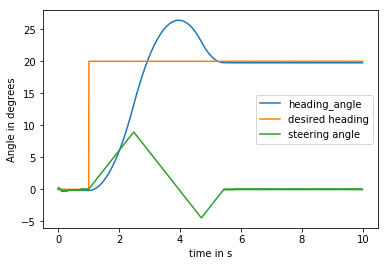

In [138]:
envm(0.7,0)

In [0]:
def envmm(kp,ki):
  fit=np.zeros((len(kp),len(kp[0])))
  for i in range(len(kp)):
    for j in range(len(kp[0])):
      fit[i][j] = envm(kp[i][j],ki[i][j])
  return fit

In [142]:
%matplotlib notebook
ax = plt.axes(projection="3d")
x= np.linspace(0,2,15)
y = np.linspace(0,2,15)
X,Y = np.meshgrid(x,y)
Z = envmm(X, Y)
print(Z)

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in exp


[[-1.13060851e+03 -7.08567383e+06 -7.19570537e+06 -7.22794047e+06
  -7.23828394e+06 -7.24846063e+06 -7.24845165e+06 -7.25845426e+06
  -7.25845271e+06 -7.25845665e+06 -7.25846088e+06 -7.26829967e+06
  -7.26828749e+06 -7.26829847e+06 -7.26828588e+06]
 [-7.15683598e+06 -7.23829047e+06 -7.25846282e+06 -7.26828620e+06
  -7.26830428e+06 -7.26829079e+06 -7.26829327e+06 -7.26828595e+06
  -7.26828690e+06 -7.27796071e+06 -7.27796947e+06 -7.27795576e+06
  -7.27795001e+06 -7.27795754e+06 -7.27795557e+06]
 [-7.41563732e+06 -7.32415588e+06 -7.30608005e+06 -7.29685723e+06
  -7.29685197e+06 -7.28748447e+06 -7.28748728e+06 -7.28748488e+06
  -7.28747109e+06 -7.28748013e+06 -7.28747480e+06 -7.28747230e+06
  -7.28747928e+06 -7.28748492e+06 -7.28747940e+06]
 [-7.47566464e+06 -7.37555123e+06 -7.34172277e+06 -7.32415503e+06
  -7.31517951e+06 -7.30608105e+06 -7.30608174e+06 -7.29684977e+06
  -7.29685363e+06 -7.29684886e+06 -7.29684910e+06 -7.29684550e+06
  -7.28747692e+06 -7.28747107e+06 -7.28746969e+06]
 [-7

<IPython.core.display.Javascript object>

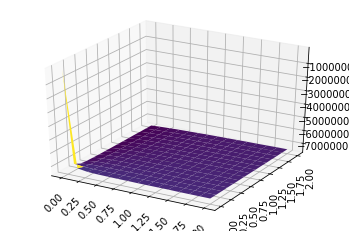

<Figure size 7200x79992 with 0 Axes>

In [143]:
%matplotlib inline
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
plt.xticks(rotation=45)
plt.yticks(rotation='vertical')

plt.figure(figsize=(100,1111))
plt.show()



In [0]:
# to randomly generate a contorller within the range
def random_birth(kp_arr, ki_arr):
  for i in range(population):
    kp_arr[i] = random.uniform(kp_min, kp_max)
    ki_arr[i]= random.uniform(ki_max, kp_min)
  return kp_arr, ki_arr

# to generate offspring from the best parents with added mutation
def offspring(kp_mean, kp_std, ki_mean, ki_std):
  kp = np.absolute(np.random.randn()*kp_mean +kp_std)
  ki = np.absolute(np.random.randn()*ki_mean + ki_std)

  #mutation 
  if random.random() < 0.1 :
    kp = np.absolute(kp + 0.1*(np.random.randn()*kp_mean+kp_std))
    ki = np.absolute(ki + 0.1*(np.random.randn()*ki_mean+ki_std))
  return kp, ki
	



In [0]:
# to iteratively create and delete generations to reach the generaton with best fitness score
def iterations(kp_arr, ki_arr, fit_arr):
  for i in range(itr):
    for j in range(population):
      fit_arr[j] = envm(kp_arr[j], ki_arr[j])

    # sort remove the half controllers with worst fitness
    sorted_index = np.argsort(fit_arr)
    kp_arr = kp_arr[sorted_index]
    ki_arr = ki_arr[sorted_index]
    fit_arr = fit_arr[sorted_index]
    kpbest.append(kp_arr[-1])
    kibest.append(ki_arr[-1])
    fitbest.append(fit_arr[-1])
    print(str(kp_arr[-1])+'  '+str(ki_arr[-1])+'  '+str(fit_arr[-1]))
    # generate offsprings with the best four controllers

    kp_mean = np.average(kp_arr[int(population/2):population])
    kp_std = np.std(kp_arr[int(population/2):population])
    ki_mean = np.average(ki_arr[int(population/2):population])
    ki_std = np.std(ki_arr[int(population/2):population])
    for j in range(int(population/2)):
      kp_arr[j], ki_arr[j] = offspring(kp_mean, kp_std, ki_mean, ki_std)
   
  return kp_arr, ki_arr, fit_arr

In [0]:
kpbest=[]
kibest=[]
fitbest=[]
kp_arr, ki_arr = random_birth(kp_arr, ki_arr)


5.731219036350355  69.50942575878764  -1650.2907797771206
5.731219036350355  69.50942575878764  -1641.4886361718266
1.4230354652003507  40.83043044351417  -464.0073119059981
1.4230354652003507  40.83043044351417  -468.7351623441673
1.303584397348896  17.32263769197472  -389.16676483419207
1.303584397348896  17.32263769197472  -393.3491662158973
0.8427305780133753  10.056970740087941  -254.04078949281472
0.8427305780133753  10.056970740087941  -258.76807766270883
0.8427305780133753  10.056970740087941  -254.21443030604803
0.37079240386448037  10.247232069282726  -182.23407716537832
0.37079240386448037  10.247232069282726  -182.06274179510658
0.5028508306236695  5.116013659759917  -155.33752532820444
0.19161889390582024  1.5321657702886657  -74.84145136698723
0.19161889390582024  1.5321657702886657  -79.20806828718061
0.14489077116043822  0.04017210219683909  -58.995014870978636
0.14489077116043822  0.04017210219683909  -61.62584024401313
0.14489077116043822  0.04017210219683909  -56.353

(array([0.06403715, 0.03693865, 0.14445209, 0.07645403, 0.01392227,
        0.08586563, 0.00214456, 0.12662012, 0.13847923, 0.16658077,
        0.11634532, 0.11440013, 0.08331594, 0.11222327, 0.13645744,
        0.11046254, 0.10543576, 0.10101088, 0.11850644, 0.08354921]),
 array([1.22958436e-05, 6.07424524e-05, 1.16142121e-04, 8.17357588e-05,
        1.99251815e-04, 1.83741064e-05, 3.83843694e-05, 7.11976326e-06,
        1.19729578e-04, 1.42433598e-05, 7.32013516e-05, 1.44474119e-04,
        9.06252534e-06, 9.71004425e-05, 1.13467311e-04, 1.30905276e-04,
        1.25655426e-04, 3.26479816e-05, 1.41785763e-04, 9.67939963e-05]),
 array([-956.83628615, -143.73187952,  -70.01701792,  -66.90373069,
         -62.81945854,  -51.86748924,  -47.75796442,  -45.48546244,
         -40.61896437,  -40.34287678,  -39.67777627,  -37.4684061 ,
         -36.78806412,  -36.60807341,  -36.22817634,  -36.19490047,
         -34.74071318,  -32.45980444,  -32.09805259,  -27.7149687 ]))

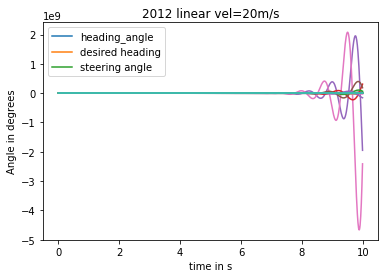

In [125]:
iterations(kp_arr, ki_arr, fit_arr)

-45.02165667418949

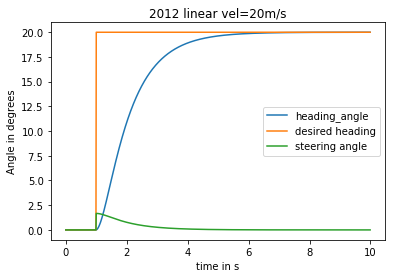

In [126]:
envm(0.08354921,9.67939963e-05)

In [0]:
len(kibest)

100

In [0]:
def pp(kpbest,kibest,fitbest):
  kpbest=np.asarray(kpbest)
  kibest=np.asarray(kibest)
  fitbest=np.asarray(fitbest)
  import pandas as pd
  clr=[]
  clrr=[]
  cnt=255/itr
  j=0
  for i in range(itr):
    clr.append((j/255.,j/255.,0))
    clrr.append((0,1-j/255.,0.8))
    j = j+cnt

  plt.scatter(kpbest, kibest, s=-fitbest*10, alpha=0.3,c=clrr)
  plt.scatter(kpbest,kibest, c=clr,s=20)
  
  plt.scatter(kpbest[-1], kibest[-1], s=-fitbest[-2]*10, alpha=0.5,c='black')
  plt.scatter(kpbest[-1], kibest[-1],c='r')
  #plt.annotate('('+str(kpbest[-1])[0:5]+','+str(kibest[-1])[0:5]+')',(kpbest[-1],kibest[-1])[0:5])
  plt.xlabel('Best Kp values of '+str(itr)+' generations')
  plt.ylabel('Best Ki values of '+str(itr)+' generations')
  plt.show()


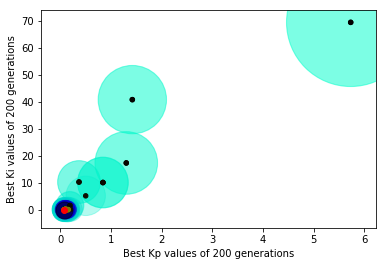

In [127]:
#v=20
pp(kpbest,kibest,fitbest)

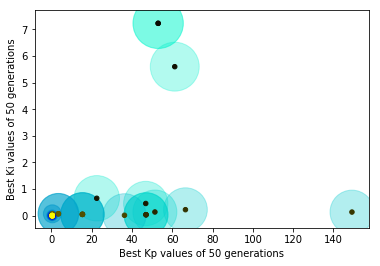

In [0]:
#v=2.4
pp(kpbest,kibest,fitbest)

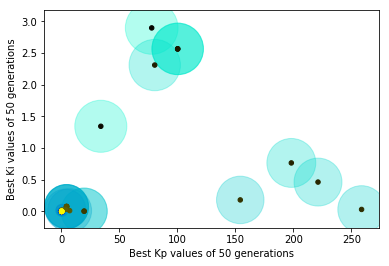

In [0]:
#v=3.1
pp(kpbest,kibest,fitbest)

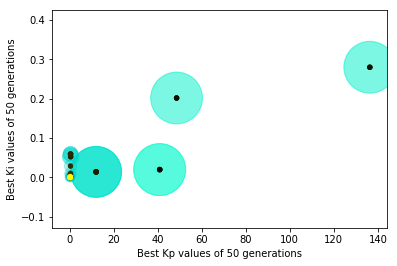

In [0]:
#v=3.8
pp(kpbest,kibest,fitbest)